# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
    ### STUDENT START ###
    labels = newsgroups_train.target_names
    for i in range(num_examples):
        
        print('    Example Number {0} '.format(i+1))
        print('    Train Label: {0} \n'.format(labels[train_labels[i]]))
        print(train_data[i])
        print('')
    ### STUDENT END ###

P1(5)

    Example Number 1 
    Train Label: comp.graphics 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

    Example Number 2 
    Train Label: talk.religion.misc 



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have 

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
def P2():
    ### STUDENT START ###
    vectorizer = CountVectorizer()
    x = vectorizer.fit_transform(train_data)
    
    print('Size of vocabulary = {0}'.format(x.shape[1]))
    print('Average number of non-zero features per example = {0}'.format(x.nnz/x.shape[0]))    
    print('Fraction of the non-zero entries in the matrix = {0}'.format(x.nnz/(x.shape[0]*x.shape[1])))
    print('First Feature Name = {0}'.format(vectorizer.get_feature_names()[0]))
    print('Last Feature Name = {0}'.format(vectorizer.get_feature_names()[-1]))
    
    print('\nUsing 4 word vocabulary')
    vectorizer = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
    x = vectorizer.fit_transform(train_data)
    print('Size of vocabulary = {0}'.format(x.shape[1]))
    print('Average number of features per example = {0}'.format(x.nnz/x.shape[0]))   
    
    print('\nUsing character analyzer')
    vectorizer = CountVectorizer(analyzer='char',ngram_range=(2, 3))
    x = vectorizer.fit_transform(train_data)
    print('Size of vocabulary = {0}'.format(x.shape[1]))
    print('Average number of features per example = {0}'.format(x.nnz/x.shape[0])) 
    
    print('\nPruning')
    vectorizer = CountVectorizer(min_df=10)
    x = vectorizer.fit_transform(train_data)
    print('Size of vocabulary = {0}'.format(x.shape[1]))
    
    
    print('\nIn development and not in Training')
    vectorizer = CountVectorizer()
    vectorizer2 = CountVectorizer()
    x = vectorizer.fit_transform(train_data)
    y = vectorizer2.fit_transform(dev_data)
    #print('Size of Train vocabulary = {0}'.format(x.shape[1]))
    #print('Size of Dev vocabulary = {0}'.format(y.shape[1]))
    train_words = vectorizer.get_feature_names()
    dev_words = vectorizer2.get_feature_names()
    counts = 0
    for i in dev_words:
        if i not in train_words:
            counts+=1
    print(counts/len(train_words))
    ### STUDENT END ###



P2()


Size of vocabulary = 26879
Average number of non-zero features per example = 96.70599803343165
Fraction of the non-zero entries in the matrix = 0.0035978272269590263
First Feature Name = 00
Last Feature Name = zyxel

Using 4 word vocabulary
Size of vocabulary = 4
Average number of features per example = 0.26843657817109146

Using character analyzer
Size of vocabulary = 35478
Average number of features per example = 684.1917404129794

Pruning
Size of vocabulary = 3064

In development and not in Training
0.14981956173964806


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [5]:
def P3():
    ### STUDENT START ###
        
    # Vectorize
    print('k-nearest neighbors')
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    y_train = train_labels
    X_test = vectorizer.transform(dev_data)
    k_values=[1,3,5,7,9,11,13]
    for k in k_values:   
        # Model
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train )
        predict = knn.predict(X_test)
        print('K = {0}'.format(k))
        print('F1 Score = ' + str(metrics.f1_score(predict,dev_labels, average="weighted")))
    
    
    print('\nnaive bayes')
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    y_train = train_labels
    X_test = vectorizer.transform(dev_data)
    alphas=[0.001,0.01,0.1,1,10]
    for i in alphas:

        NB = MultinomialNB(alpha = i)
        NB.fit(X_train, y_train)
        predict = NB.predict(X_test)
        print('Alpha = {0}'.format(i))
        print('F1 Score = ' + str(metrics.f1_score(predict,dev_labels, average="weighted")))
        
    print('\nlogistic regression') 
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    y_train = train_labels
    X_test = vectorizer.transform(dev_data)
    c_values = [0.01,0.1,0.5,1,10]
    for i in c_values:

        LR = LogisticRegression(C=i, solver="liblinear", multi_class="auto")
        LR.fit(X_train, y_train )
        predict = LR.predict(X_test)
        print('\nC = {0}'.format(i))
        print('F1 Score = ' + str(metrics.f1_score(predict,dev_labels, average="weighted")))
        for j in range(4):
            print('{0} - {1}'.format(newsgroups_train.target_names[j],np.sum((LR.coef_[j])**2)))
    ### STUDENT END ###

P3()

k-nearest neighbors
K = 1
F1 Score = 0.38576918749596
K = 3
F1 Score = 0.41998734432014306
K = 5
F1 Score = 0.4173931225320104
K = 7
F1 Score = 0.4370948644358654
K = 9
F1 Score = 0.42438012794232743
K = 11
F1 Score = 0.4106673046392548
K = 13
F1 Score = 0.42211045781620815

naive bayes
Alpha = 0.001
F1 Score = 0.7800439743725949
Alpha = 0.01
F1 Score = 0.7840052757787004
Alpha = 0.1
F1 Score = 0.7954935780581611
Alpha = 1
F1 Score = 0.7843981539130703
Alpha = 10
F1 Score = 0.7260096904346977

logistic regression

C = 0.01
F1 Score = 0.6932884239221984
alt.atheism - 2.5414784670795845
comp.graphics - 2.9397093683564717
sci.space - 2.8624688387630717
talk.religion.misc - 2.2500292098346186

C = 0.1
F1 Score = 0.7116596694267557
alt.atheism - 27.12949732751038
comp.graphics - 24.65904426384125
sci.space - 27.457741536123102
talk.religion.misc - 23.026053110103373

C = 0.5
F1 Score = 0.7218796970690614
alt.atheism - 102.5943005445644
comp.graphics - 83.11964856830168
sci.space - 99.038072

ANSWER: 
KNN does not work well since it finds the K nearest matches in the training data. But in this problem we need to use all the examples that relate to each topic so we can get as much information about individual words as possible. KNN in this example wastes a lot of information. Also a euclidean distance does not make sense here.

Naive bayes utilizes independence and for this purpose this assumption helps our predictions. Having each word individual is good since it can be used in different contexts in different documents.

Logistic regression works best for binary classification and in this case we have multiple labels.

Increase in C value increases the sum of the squared weights.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [6]:
def P4():
    ### STUDENT START ###
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    X_train = vectorizer.fit_transform(train_data)
    y_train = train_labels

    clf=LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")

    clf.fit(X_train,y_train)

    words = []
    word_weights = {}

    for i in range(4):
        for j in np.argsort(clf.coef_[i])[-5:]:
            words.append([vectorizer.get_feature_names()[j], j])
    

    for word in words:
        if word[0] not in word_weights:
            word_weights.update({word[0]: 
                                 [clf.coef_[0][word[1]],
                                  clf.coef_[1][word[1]],
                                  clf.coef_[2][word[1]],
                                  clf.coef_[3][word[1]]]})


    x = newsgroups_train.target_names
    return pd.DataFrame.from_dict(word_weights, orient='index', columns=[x[0],x[1],x[2],x[3]])
    ### STUDENT END ###

P4()

,alt.atheism,comp.graphics,sci.space,talk.religion.misc
are you,0.446954,-0.248257,-0.097166,-0.305622
you are,0.472741,-0.279913,-0.481426,0.028367
was just,0.482050,-0.131419,-0.128862,-0.227465
cheers kent,0.555719,-0.697903,-0.663776,0.534812
claim that,0.605549,-0.199042,-0.274383,-0.140369
is there,-0.340882,0.754978,-0.468250,-0.257080
out there,-0.274802,0.758683,-0.479004,-0.277087
comp graphics,-0.292166,0.801202,-0.370919,-0.285185
in advance,-0.459351,0.832568,-0.438488,-0.418455
looking for,-0.630341,1.108366,-0.499926,-0.571863


ANSWER: It is interesting to see that the phrase 'cheers kent' is one of the highest weights for both alt.atheism and talk.religion.misc. It makes sense to see 'the moon' and 'the space' has a high weight in sci.spcae but none of the other topics. 'comp graphics' has one of the highest weights for comp.graphics topics which checks out.

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [134]:

def better_preprocessor(s):
    ### STUDENT START ###
    s = str(s)
    s = s.lower()
    s = s.replace('\n',' ')
    s = re.sub(r'[^\w]', ' ', s) 
    s = re.sub(r'/[0-9]/g', "#",s)
    s = re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', "",s)
    return s
    ### STUDENT END ###

def P5():
    ### STUDENT START ###
    def no_processor(x):
        return str(x)
    print('No Processing')
    vectorizer = CountVectorizer(preprocessor=no_processor)
    X_train = vectorizer.fit_transform(train_data)
    y_train = train_labels
    X_test = vectorizer.transform(dev_data)

    print('Size of vocabulary = {0}'.format(X_train.shape[1]))

    LR = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LR.fit(X_train, y_train )
    predict = LR.predict(X_test)

    print('F1 Score = ' +str(metrics.f1_score(predict,dev_labels, average="weighted")))

    print('\nBetter Processor')

    vectorizer = CountVectorizer(preprocessor=better_preprocessor)
    X_train = vectorizer.fit_transform(train_data)
    y_train = train_labels
    X_test = vectorizer.transform(dev_data)
    print('Size of vocabulary = {0}'.format(X_train.shape[1]))
    LR = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LR.fit(X_train, y_train )
    predict = LR.predict(X_test)

    print('F1 Score = ' +str(metrics.f1_score(predict,dev_labels, average="weighted")))
    ### STUDENT END ###

P5()

No Processing
Size of vocabulary = 33291
F1 Score = 0.7161660045275731

Better Processor
Size of vocabulary = 26876
F1 Score = 0.7218796970690614


ANSWER: Improved model reduced vocab size by around 5000 words. It was tough to improve accuracy using string manipulation, but I was able to improve it by 0.005.

### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

Model with L1 Reg Strength = 0.01 , Accuracy = 0.5126574221213344
Model with New Vocabulary Size 16, L2 Reg Strength = 0.5, Accuracy = 0.49396992181579336 

Model with L1 Reg Strength = 0.03 , Accuracy = 0.5701428049693021
Model with New Vocabulary Size 65, L2 Reg Strength = 0.5, Accuracy = 0.6105105196049312 

Model with L1 Reg Strength = 0.05 , Accuracy = 0.6173745244684843
Model with New Vocabulary Size 121, L2 Reg Strength = 0.5, Accuracy = 0.6509971716174028 

Model with L1 Reg Strength = 0.1 , Accuracy = 0.6535296116585999
Model with New Vocabulary Size 206, L2 Reg Strength = 0.5, Accuracy = 0.6926460508868663 



/Users/frankbruni/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model with L1 Reg Strength = 0.5 , Accuracy = 0.7004078331330036
Model with New Vocabulary Size 706, L2 Reg Strength = 0.5, Accuracy = 0.6868085259576607 



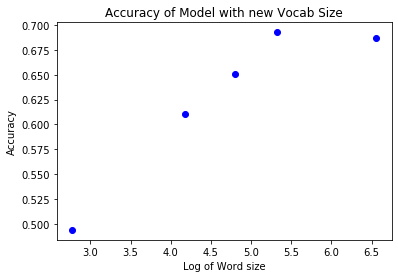

In [131]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ### STUDENT START ###
    
    
    L1 = []
    L2 = []
    Words = []
    l1_reg_strength = [0.01,0.03,0.05,0.1,0.5]
    for i in l1_reg_strength:

        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(train_data)
        y_train = train_labels
        X_test = vectorizer.transform(dev_data)

        LR = LogisticRegression(C=i, solver="liblinear", multi_class="auto",penalty='l1')
        LR.fit(X_train, y_train )
        predict = LR.predict(X_test)


        L1.append(metrics.f1_score(predict,dev_labels, average="weighted"))
        print('Model with L1 Reg Strength = {0} , Accuracy = {1}'.format(i, metrics.f1_score(predict,dev_labels, average="weighted")))

        word_keep = np.nonzero(LR.coef_)[1]
        result= [vectorizer.get_feature_names()[i] for i in word_keep]
        result=np.unique(result)


        vectorizer = CountVectorizer(vocabulary = result)
        X_train = vectorizer.fit_transform(train_data)
        y_train = train_labels
        X_test = vectorizer.transform(dev_data)

        LR = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto",penalty='l2',tol=0.015)
        LR.fit(X_train, y_train )
        predict = LR.predict(X_test)
        L2.append(metrics.f1_score(predict,dev_labels, average="weighted"))
        Words.append(len(result))
        print('Model with New Vocabulary Size {1}, L2 Reg Strength = 0.5, Accuracy = {0} \n'.format(metrics.f1_score(predict,dev_labels, average="weighted"),len(result)))

    plt.plot(np.log(Words),L2,'bo',label=l1_reg_strength)
    plt.xlabel('Log of Word size')
    plt.title('Accuracy of Model with new Vocab Size')
    plt.ylabel('Accuracy')
### STUDENT END ###

P6()

ANSWER: Performance increases with bigger vocabularies. It increases in accuracy up to around 70%. This leads me to believe there are alot of important words in our documents all of which are necessary in our model.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [102]:
def P7():
    ### STUDENT START ###
    

    vectorizer = TfidfVectorizer()

    X_train = vectorizer.fit_transform(train_data)
    y_train = train_labels
    X_test = vectorizer.transform(dev_data)

    LR = LogisticRegression(C=100, solver="liblinear", multi_class="auto",penalty='l2')
    LR.fit(X_train, y_train )
    predict = LR.predict(X_test)
    print('F1-score {}'.format(metrics.f1_score(predict,dev_labels, average="weighted")))
    predict_proba = LR.predict_proba(X_test)
   
    correct_label_prob = []
    for i in range(len(predict_proba)):
        correct_label_prob.append(predict_proba[i][dev_labels[i]])
    
    r = np.amax(predict_proba,1)/correct_label_prob
 
    max_indicies = np.argsort(r)[-3:]
    print('\nTop 3 Documents\n')
    for i in max_indicies:
        print('R ratio {}'.format(r[i]))
        print(dev_data[i])
### STUDENT END ###

P7()

F1-score 0.7668609761496009

Top 3 Documents

R ratio 287.3071989138709

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...

R ratio 325.00442569199106
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.
R ratio 929.3590022592057
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this

ANSWER: TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. In TfidfVectorizer we consider overall document weight of a word. It helps us in dealing with most frequent words. I think of it as almost a normalizing process. Using it we can penalize frequent words. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

TF-IDF in the examples above puts too much value on words like ftp, internet, online even though mormon is also a word and should dominate the others. Training on more data will help this mistake.

An R ratio of 1 means that it is most likely to predict the correct label since our highest predicted probability is the same as the correct label probability. This is valuable information and the R ratio helps us understand the type of mistake we are making. If we get a predicted probability of the correct label really small and a large probability on another label our R ratio is really large (this is what happens in our printed examples). The R ratio can never be below 1 so we can gain information by seeing how much bigger than 1 the R ratio is.

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.